# Emma Schoofs - R0929443

# EDA

### Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### explenation of some features:  
  
Pclass: 1 = First class 2 = Second class 3 = Third class  
SibSp: Number of siblings  
Parch: Number of Parents/Children Aboard  
Embarked: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)  

In [3]:
df = pd.read_csv("titanic_correct.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Start EDA

First we had a quick look over the titanic_correct.csv file and saw that there were many values missing from the Cabin column. We also saw that the column Ticket did not contribute much and we had the same idea with the column Name.

So we have started dropping features: Name, Ticket and Cabin, because they are not very important or contribute much to the model.

In [4]:
df_cleaned = df.drop(columns=['Name', 'Ticket', 'Cabin', 'PassengerId'])
df_cleaned.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Then we looked for missing values and saw that there were values missing in colom Age and Embarked.

In [5]:
df_cleaned.info()
print(df_cleaned.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB
Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64


We filled these missing values with the median for Age and the most frequent value for Embarked.

In [6]:
# Impute missing Age values with the median age
df_cleaned['Age'].fillna(df_cleaned['Age'].median(), inplace=True)

# Impute missing Embarked values with the mode (most frequent value)
df_cleaned['Embarked'].fillna(df_cleaned['Embarked'].mode()[0], inplace=True)

print(df_cleaned.isnull().sum()) 
df_cleaned.head()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


After that, we are going to look for outliers in the columns Age and Fare.

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_17504\2012094686.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Age'])
C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_17504\2012094686.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Fare'])


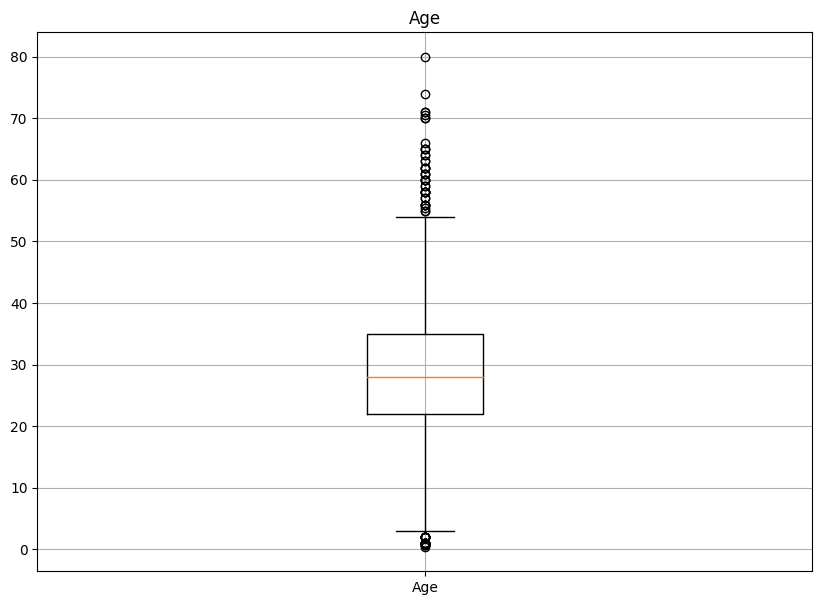

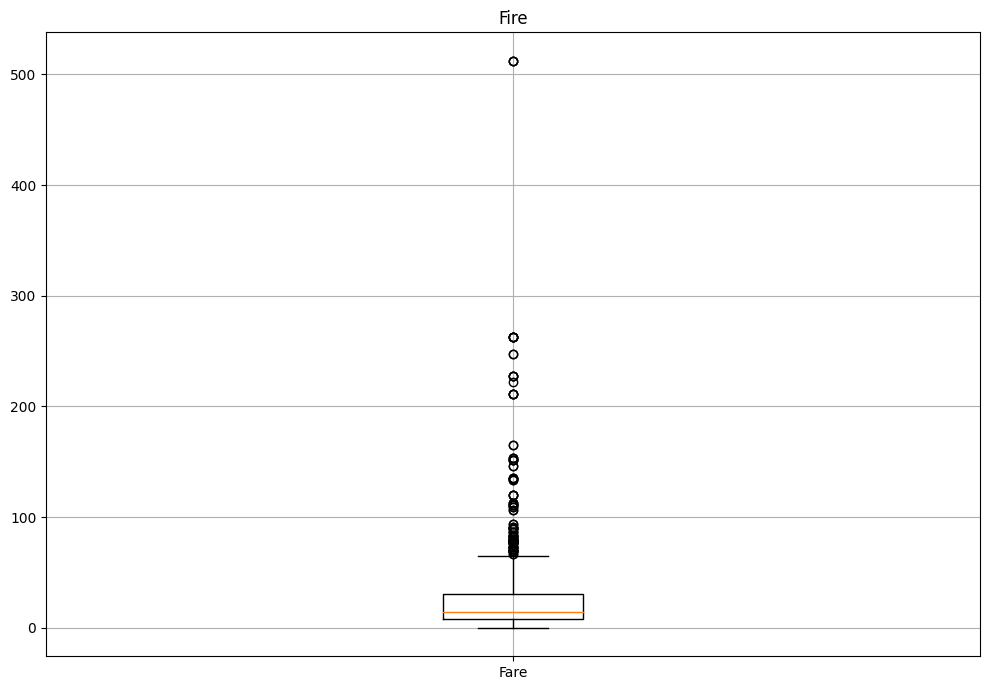

In [24]:
Age = df_encoded['Age']


fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
ax.set_xticklabels(['Age'])
plt.title("Age")
plt.grid()
# Creating plot
plt.boxplot(Age)

Fair = df_encoded['Fare']
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
ax.set_xticklabels(['Fare'])
plt.title("Fire")
plt.grid()
plt.boxplot(Fair)
plt.tight_layout()
plt.show()

We see that there are many outliers in both boxplots.  We are going to leave the outliers in the Age in the dataset. But in the Fair there are distant outliers, these outliers (above 200) can have a lot of impact to the model. We're going to take a look at these rows.

In [31]:
fare_higher_200 = df_encoded[df_encoded['Fare'] > 200]
fare_higher_200


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
27,0,1,19.0,3,2,263.0000,True,False,False,True
88,1,1,23.0,3,2,263.0000,False,False,False,True
118,0,1,24.0,0,1,247.5208,True,True,False,False
258,1,1,35.0,0,0,512.3292,False,True,False,False
299,1,1,50.0,0,1,247.5208,False,True,False,False
311,1,1,18.0,2,2,262.3750,False,True,False,False
341,1,1,24.0,3,2,263.0000,False,False,False,True
377,0,1,27.0,0,2,211.5000,True,True,False,False
380,1,1,42.0,0,0,227.5250,False,True,False,False
438,0,1,64.0,1,4,263.0000,True,False,False,True


In [34]:
pclass_1 = df_encoded[(df_encoded['Pclass'] == 1)].shape[0]
print("number of rows where Pclass is 1:", pclass_1)
pclass_1_fare_200 = df_encoded[(df_encoded['Pclass'] == 1) & (df_encoded['Fare'] > 200)].shape[0]
print("number of rows where Pclass is 1 and Fare higher than 200:", pclass_1_fare_200)

number of rows where Pclass is 1: 216
number of rows where Pclass is 1 and Fare higher than 200: 20


There are 20 rows with Pclass 1 and a Fare higher than 200. Since there are only 216 rows representing Pclass 1 (out of 891), we are not going to make this even smaller. 

We then encoded the column Sex and Embarked data. Because these are categorical (nominal).

In [7]:
#Encoding data
df_encoded = df_cleaned.copy()
df_encoded = pd.get_dummies(df_encoded,columns=['Sex'], drop_first=True)
df_encoded = pd.get_dummies(df_encoded,columns=['Embarked'])
df_encoded.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,False,True
1,1,1,38.0,1,0,71.2833,False,True,False,False
2,1,3,26.0,0,0,7.9250,False,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,False,True


We have finished editing the dataset. Now we are going to save the edited dataset.

In [36]:
df_encoded.to_csv("cleaned_titanic_dataset.csv", index=False)

Next, we plotted a correlation matrix.

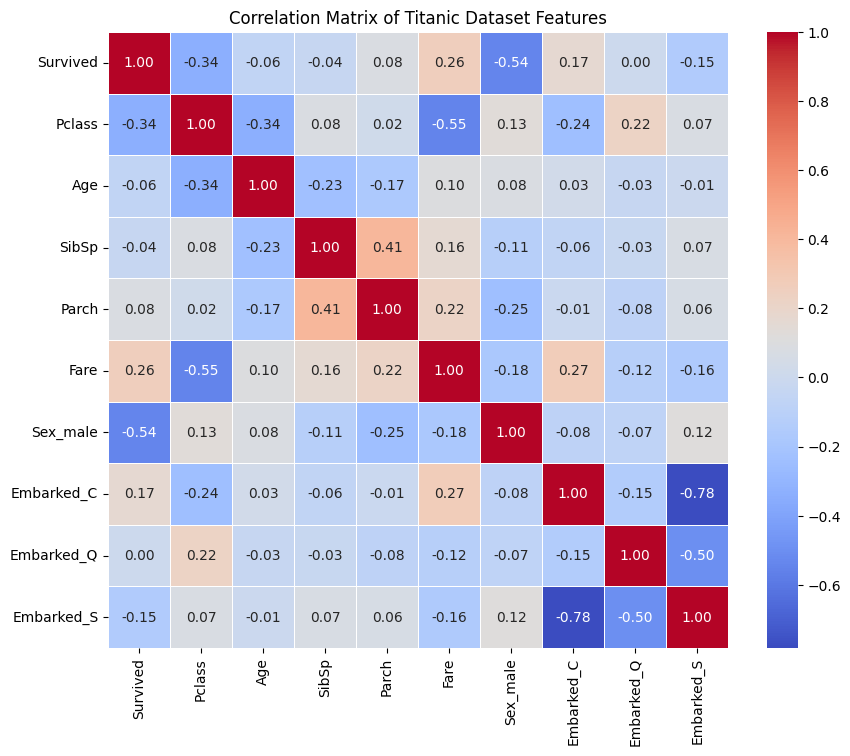

In [7]:
# Plot the correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df_encoded.corr()

# create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Titanic Dataset Features')
plt.show()


There is a high positive corrolation between Survived and Sex because women (and children) were allowed to get on lifeboats first.  
there is a high negative corrolation between Pclass and Fare because first class is more expensive than third class.
there is a negative corrolation of -0.34 between Age and Pclass. We go into a little more detail here.

We are going to set up a barchart of the ages in each class.

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_17504\2326794632.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pclass_age_counts = df_encoded.groupby(['Pclass', pd.cut(df_encoded['Age'], bins=age_bins)]).size().unstack(fill_value=0)


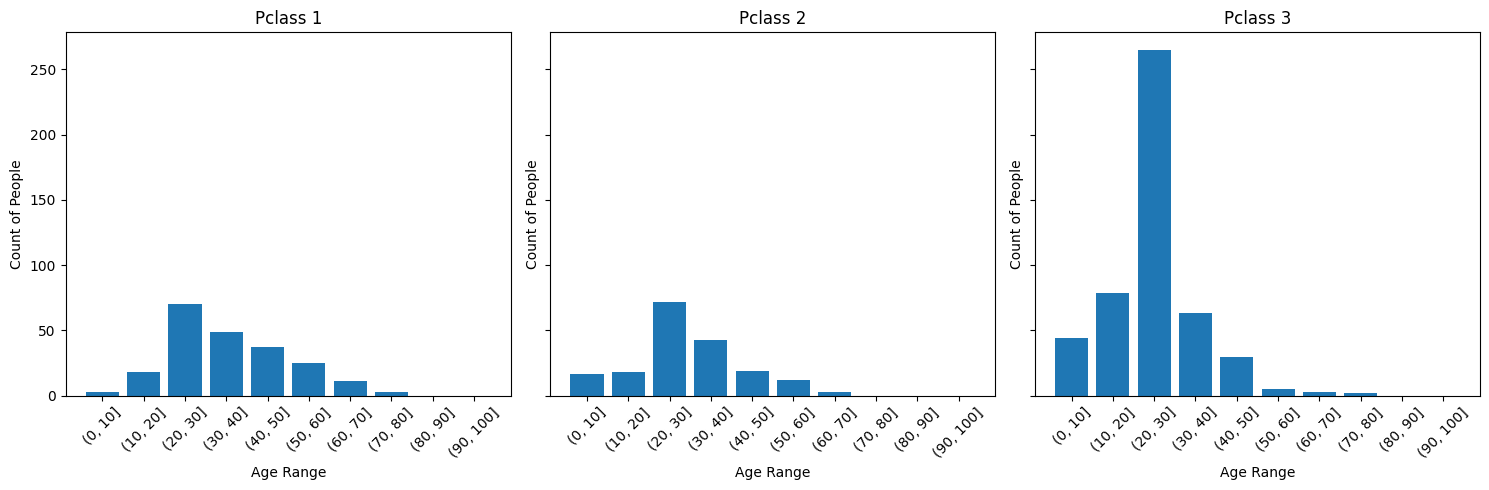

In [37]:
# Define age bins (0-9, 10-19, 20-29, etc.)
age_bins = range(0, 101, 10)

# Group by both 'Pclass' and 'AgeRange', and count the entries
pclass_age_counts = df_encoded.groupby(['Pclass', pd.cut(df_encoded['Age'], bins=age_bins)]).size().unstack(fill_value=0)

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Loop through each Pclass
for i, pclass in enumerate(pclass_age_counts.index):
    age_counts = pclass_age_counts.loc[pclass]
    axes[i].bar(age_counts.index.astype(str), age_counts.values)
    axes[i].set_title(f'Pclass {pclass}')
    axes[i].set_xlabel('Age Range')
    axes[i].set_ylabel('Count of People')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x labels for readability

plt.tight_layout()

plt.show()


The negative corrolation of -0.34 is because there are a lot of young people in the third class. So how higher the value of the class how lower the age.

Now that we have examined the correlations, we will take a look at how the survival rates look.

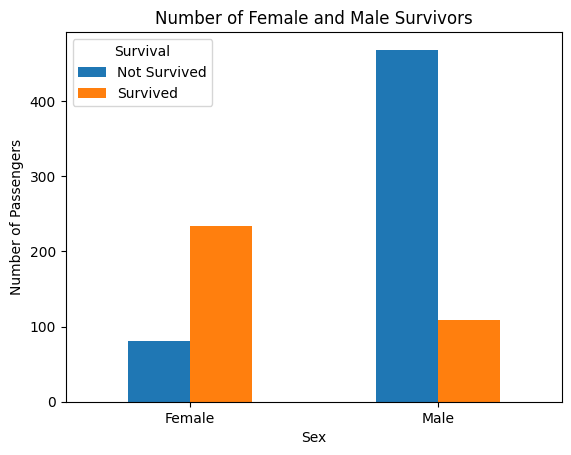

In [28]:
survival_count = df_encoded.groupby(['Sex_male', 'Survived']).size().unstack()
survival_count.index = ['Female', 'Male']  

labels = []
if 0 in survival_count.columns:  
    labels.append('Not Survived')
if 1 in survival_count.columns: 
      labels.append('Survived')


survival_count.plot(kind='bar', stacked=False)

plt.title('Number of Female and Male Survivors')
plt.xlabel('Sex')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=0) 

plt.legend(labels, title='Survival')

plt.show()

Now we are going to check what percentage of the age classes survived the disaster.

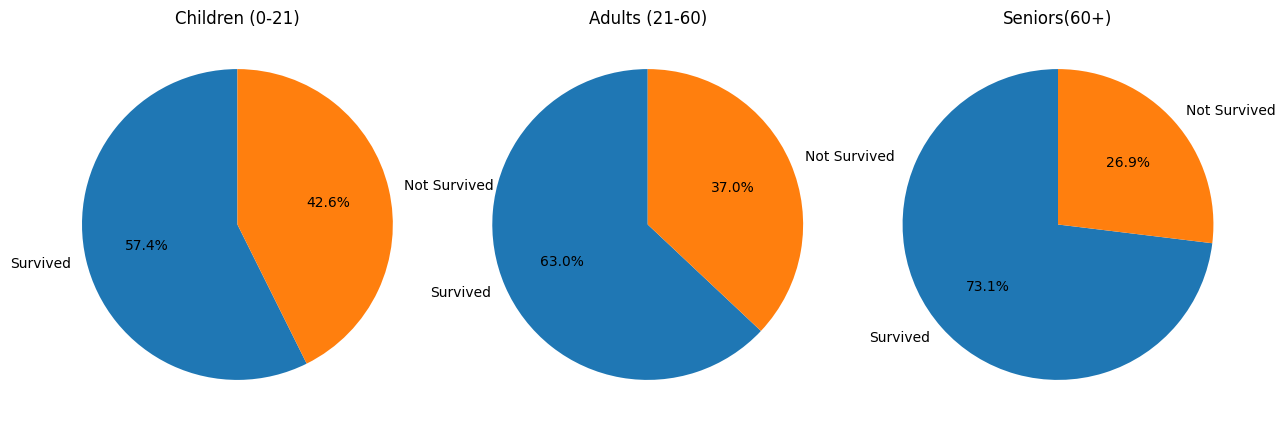

In [ ]:
def plot_survival_pie(df_encoded, age_min, age_max, title):
    subset = df_encoded[(df_encoded['Age'] >= age_min) & (df_encoded['Age'] <= age_max)]
    survived_counts = subset['Survived'].value_counts(normalize=True) * 100 #This argument converts the counts into relative frequencies,
    #i.e., the percentage of passengers who survived and who did not survive, relative to the total number of passengers in the subset
    # *100 to convert the relative frequencies into percentages
    
    labels = []
    if 1 in survived_counts.index:
        labels.append('Survived')
    if 0 in survived_counts.index:
        labels.append('Not Survived')

    plt.pie(survived_counts, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.title(title)
    plt.axis('equal') #keeps it round


plt.figure(figsize=(15, 5))

# children (0-21)
plt.subplot(1, 3, 1)
plot_survival_pie(df_encoded, 0, 21, title="Children (0-21)") #In the days of the titanic, you were an adult from the age of 21

# adulds (21-60)
plt.subplot(1, 3, 2)
plot_survival_pie(df_encoded, 21, 60, title="Adults (21-60)")

# 60-plus
plt.subplot(1, 3, 3)
plot_survival_pie(df_encoded, 60, 150, title="Seniors(60+)")

plt.show()



This result is not what we expected. The survival rate among seniors is very high and then low among children. The reason for this is possibly because under children we count anyone who is younger than 21 even though around your 15 you are no longer really considered a child. In addition, there were also mostly children in third class, these may have been given priority later to be allowed on the lifeboats or the third class cabins are further away from the lifeboats. That the survival rate among seniors is so high may be because there were few seniors on the boat and therefore a greater impact can be seen in the graph if someone survives. Alsook might be that there were many female seniors. 

We are going to make a further distinction between men and women per age class.

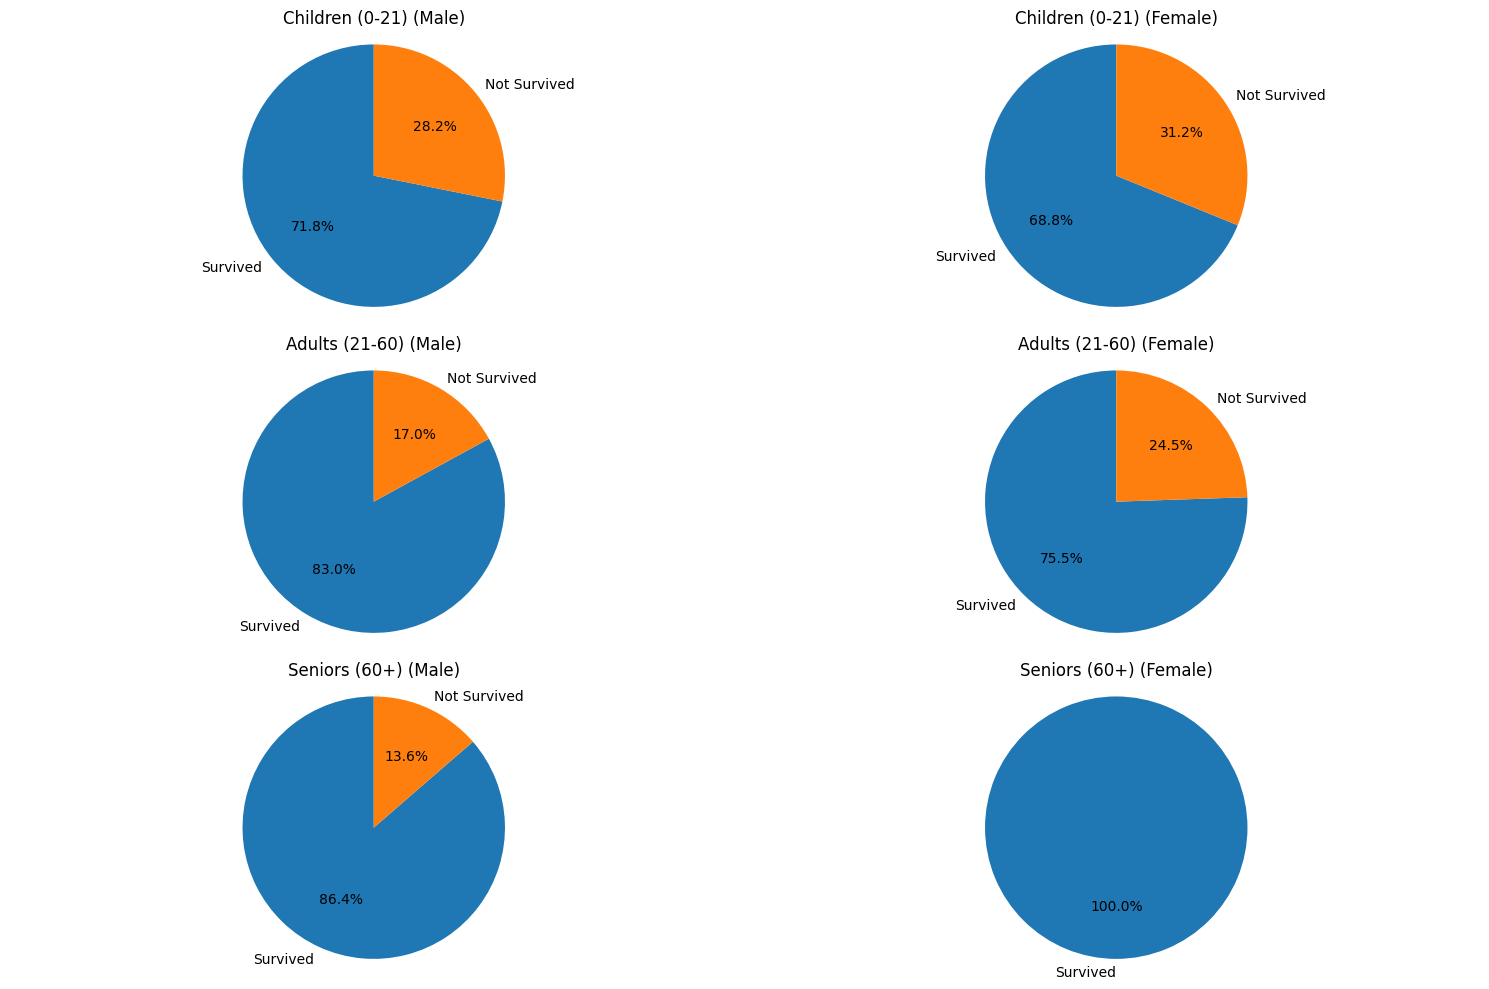

Number of man over 60: 19
Number of women over 60: 3


In [ ]:
def plot_survival_pie(df, age_min, age_max, sex, title):
    subset = df[(df['Age'] >= age_min) & (df['Age'] < age_max) & (df['Sex_male'] == sex)]
    survived_counts = subset['Survived'].value_counts(normalize=True) * 100
    
    labels = []
    if 1 in survived_counts.index:
        labels.append('Survived')
    if 0 in survived_counts.index:
        labels.append('Not Survived')
    
    plt.pie(survived_counts, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.title(f"{title} ({'Male' if sex else 'Female'})")
    plt.axis('equal')

# Plot pie charts
plt.figure(figsize=(15, 10))

# children (0-21 jaar)
plt.subplot(3, 2, 1)
plot_survival_pie(df_encoded, 0, 21, True, title="Children (0-21)")
plt.subplot(3, 2, 2)
plot_survival_pie(df_encoded, 0, 21, False, title="Children (0-21)")

# adults (21-60 jaar)
plt.subplot(3, 2, 3)
plot_survival_pie(df_encoded, 21, 60, True, title="Adults (21-60)")
plt.subplot(3, 2, 4)
plot_survival_pie(df_encoded, 21, 60, False, title="Adults (21-60)")

# Seniors (60+ jaar)
plt.subplot(3, 2, 5)
plot_survival_pie(df_encoded, 60, 150, True, title="Seniors (60+)")
plt.subplot(3, 2, 6)
plot_survival_pie(df_encoded, 60, 150, False, title="Seniors (60+)")

plt.tight_layout()
plt.show()

num_women_over_60 = df_encoded[(df_encoded['Sex_male'] == True) & (df_encoded['Age'] > 60)].shape[0]
print("Number of man over 60:", num_women_over_60)
num_women_over_60 = df_encoded[(df_encoded['Sex_male'] == False) & (df_encoded['Age'] > 60)].shape[0]
print("Number of women over 60:", num_women_over_60)


We see that there are many surviving seniors. This may be because there are only 22 seniors in our dataset. We also see that the theory we first had about there being many female seniors is not correct. there were only 3 but they all survived.

We now take a look at what the survival rates were by class regardless of age. ! Beware the labels have changed ! orange = Survived, blue = Not Survived !

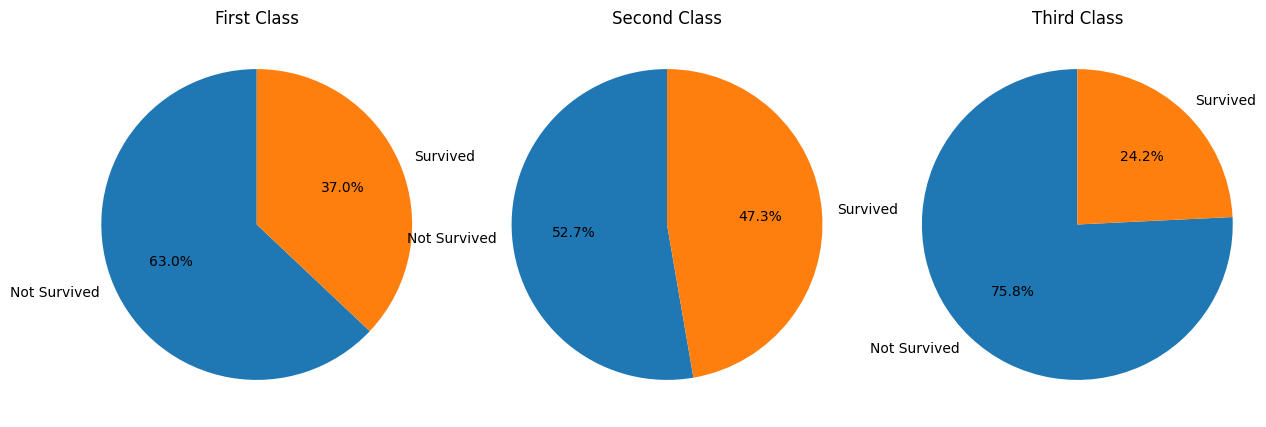

In [ ]:
def plot_survival_pie(df_encoded, pclass, title):
    subset = df_encoded[df_encoded['Pclass'] == pclass]
    survived_counts = subset['Survived'].value_counts(normalize=True) * 100
    
    labels = []
    if 0 in survived_counts.index:
        labels.append('Not Survived')
    if 1 in survived_counts.index:
        labels.append('Survived')

        
    plt.pie(survived_counts, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.title(title)
    plt.axis('equal')


plt.figure(figsize=(15, 5))

# first class
plt.subplot(1, 3, 1)
plot_survival_pie(df_encoded, 1, title="First Class")

# second class
plt.subplot(1, 3, 2)
plot_survival_pie(df_encoded, 2, title="Second Class")

# third class
plt.subplot(1, 3, 3)
plot_survival_pie(df_encoded, 3, title="Third Class")

plt.show()


We see that most of the survivors are from the second division. We take a closer look at this.

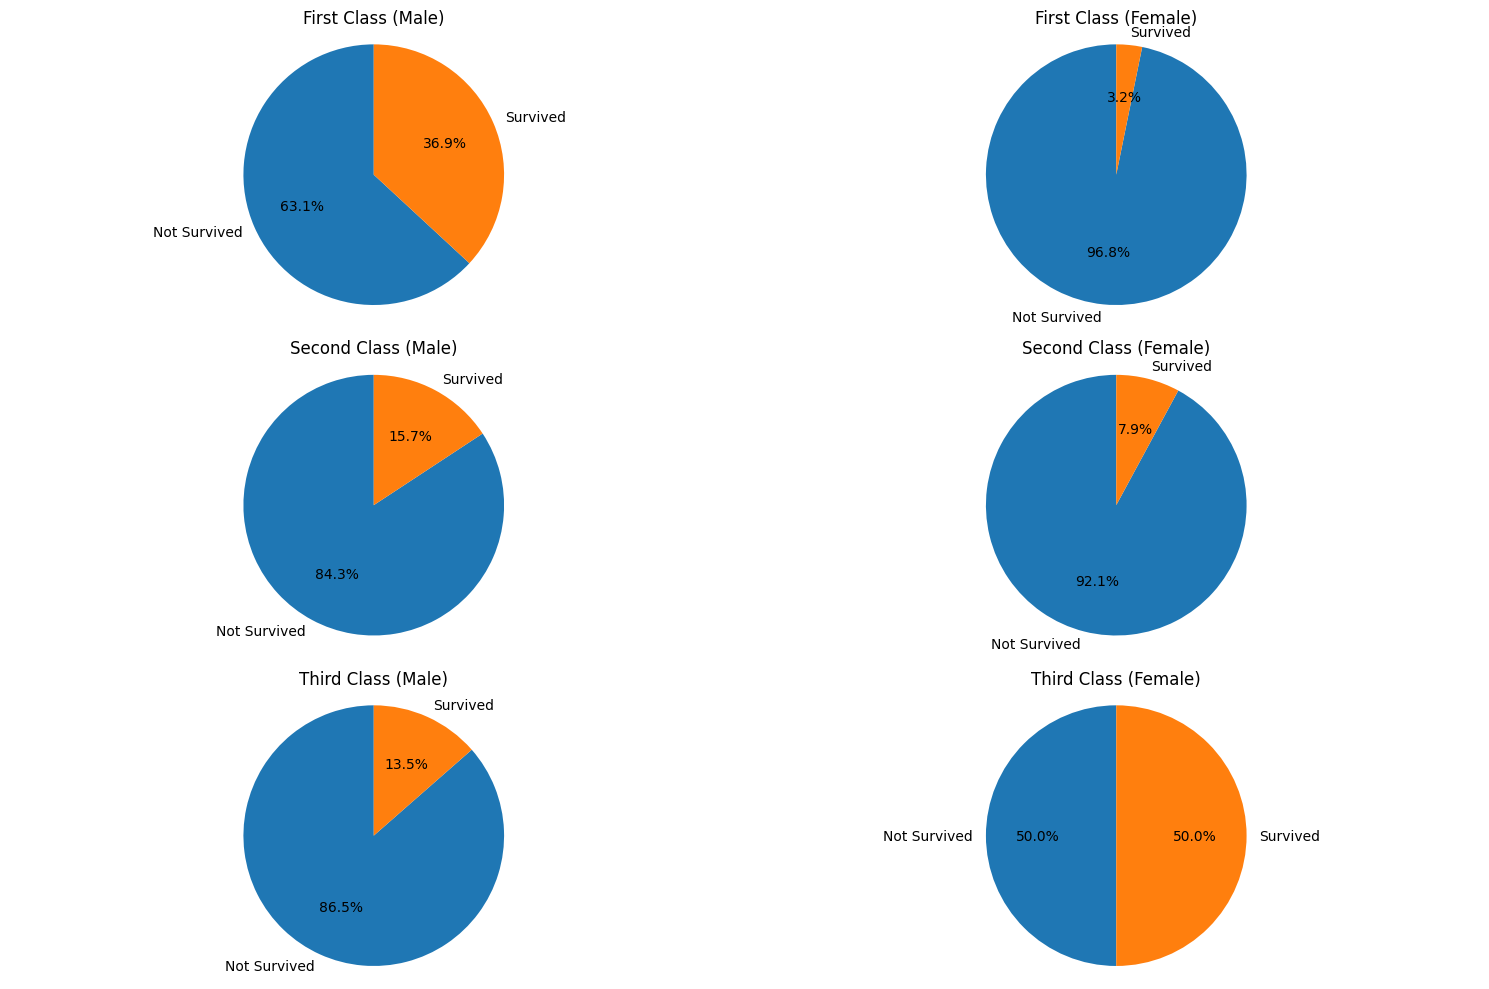

Number of men under 21 in first class: 7
Number of men in first class: 122
Number of women under 21 in first class: 14
Number of women in first class: 94


Number of men under 21 in second class: 19
Number of men in second class: 108
Number of women under 21 in second class: 16
Number of women in second class: 76


Number of men under 21 in third class: 77
Number of men in third class: 347
Number of women under 21 in third class: 47
Number of women in third class: 144


In [ ]:
def plot_survival_pie(df_encoded, pclass, sex, title):
    subset = df_encoded[(df_encoded['Pclass'] == pclass) & (df_encoded['Sex_male'] == sex)]
    survived_counts = subset['Survived'].value_counts(normalize=True) * 100

    labels = []
    if 0 in survived_counts.index:
        labels.append('Not Survived')
    if 1 in survived_counts.index:
        labels.append('Survived')
    
    plt.pie(survived_counts, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.title(f"{title} ({'Male' if sex else 'Female'})")
    plt.axis('equal')

# Plotten pie charts
plt.figure(figsize=(15, 10))

# first class - man and women
plt.subplot(3, 2, 1)
plot_survival_pie(df_encoded, 1, True, title="First Class")
plt.subplot(3, 2, 2)
plot_survival_pie(df_encoded, 1, False, title="First Class")

# second class - man and women 
plt.subplot(3, 2, 3)
plot_survival_pie(df_encoded, 2, True, title="Second Class")
plt.subplot(3, 2, 4)
plot_survival_pie(df_encoded, 2, False, title="Second Class")

# third class - man and women
plt.subplot(3, 2, 5)
plot_survival_pie(df_encoded, 3, True, title="Third Class")
plt.subplot(3, 2, 6)
plot_survival_pie(df_encoded, 3, False, title="Third Class")

plt.tight_layout()
plt.show()


num_men_under_21_first_class = df_encoded[(df_encoded['Sex_male'] == True) & (df_encoded['Age'] < 21) & (df_encoded['Pclass'] == 1)].shape[0] #shape[0] retrieve number of rows
print("Number of men under 21 in first class:", num_men_under_21_first_class)
num_men_second_class = df_encoded[(df_encoded['Sex_male'] == True) & (df_encoded['Pclass'] == 1)].shape[0]
print("Number of men in first class:", num_men_second_class)
num_women_under_21_first_class = df_encoded[(df_encoded['Sex_male'] == False) & (df_encoded['Age'] < 21) & (df_encoded['Pclass'] == 1)].shape[0]
print("Number of women under 21 in first class:", num_women_under_21_first_class)
num_women_first_class = df_encoded[(df_encoded['Sex_male'] == False) & (df_encoded['Pclass'] == 1)].shape[0]
print("Number of women in first class:", num_women_first_class)
print('\n')

num_men_under_21_second_class = df_encoded[(df_encoded['Sex_male'] == True) & (df_encoded['Age'] < 21) & (df_encoded['Pclass'] == 2)].shape[0]
print("Number of men under 21 in second class:", num_men_under_21_second_class)
num_men_second_class = df_encoded[(df_encoded['Sex_male'] == True) & (df_encoded['Pclass'] == 2)].shape[0]
print("Number of men in second class:", num_men_second_class)
num_women_under_21_second_class = df_encoded[(df_encoded['Sex_male'] == False) & (df_encoded['Age'] < 21) & (df_encoded['Pclass'] == 2)].shape[0]
print("Number of women under 21 in second class:", num_women_under_21_second_class)
num_women_second_class = df_encoded[(df_encoded['Sex_male'] == False) & (df_encoded['Pclass'] == 2)].shape[0]
print("Number of women in second class:", num_women_second_class)
print('\n')

num_men_under_21_third_class = df_encoded[(df_encoded['Sex_male'] == True) & (df_encoded['Age'] < 21) & (df_encoded['Pclass'] == 3)].shape[0]
print("Number of men under 21 in third class:", num_men_under_21_third_class)
num_men_third_class = df_encoded[(df_encoded['Sex_male'] == True) & (df_encoded['Pclass'] == 3)].shape[0]
print("Number of men in third class:", num_men_third_class)
num_women_under_21_third_class = df_encoded[(df_encoded['Sex_male'] == False) & (df_encoded['Age'] < 21) & (df_encoded['Pclass'] == 3)].shape[0]
print("Number of women under 21 in third class:", num_women_under_21_third_class)
num_women_third_class = df_encoded[(df_encoded['Sex_male'] == False) & (df_encoded['Pclass'] == 3)].shape[0]
print("Number of women in third class:", num_women_third_class)


This graph is unexpected. There are a lot of surviving men in all classes. However, among the third class, only half of the women survive the disaster. I don't really have an explanation for this.

## Conclusion
Normally, women and children have a higher survival rate than men. While drawing conclusions, it is important to remember that there is a large imbalance in ages, sex and class. This can distort the picture when making percentage-based graphs.
